**main.py** <br>
This file is used for training the neural network and testing some images.
This also saves the model into a file in the same repository and use for later runs.

Trained model loaded successfully.
313/313 [==============================] - 2s 6ms/step - loss: 0.0470 - accuracy: 0.9855
Test accuracy: 0.9854999780654907
313/313 [==============================] - 2s 6ms/step
Done testing here 0
Done testing here 1
Done testing here 2
Done testing here 3
Done testing here 4
Done testing here 5
Done testing here 6
Done testing here 7
Done testing here 8
Done testing here 9
Done testing here 10
Done testing here 11
Done testing here 12
Done testing here 13
Done testing here 14
Done testing here 15
Done testing here 16
Done testing here 17
Done testing here 18
Done testing here 19
Done testing here 20
Done testing here 21
Done testing here 22
Done testing here 23
Done testing here 24
Done testing here 25
Done testing here 26
Done testing here 27
Done testing here 28
Done testing here 29
Done testing here 30
Done testing here 31
Done testing here 32
Done testing here 33
Done testing here 34
Done testing here 35
Done testing here 36
Done testing here 37

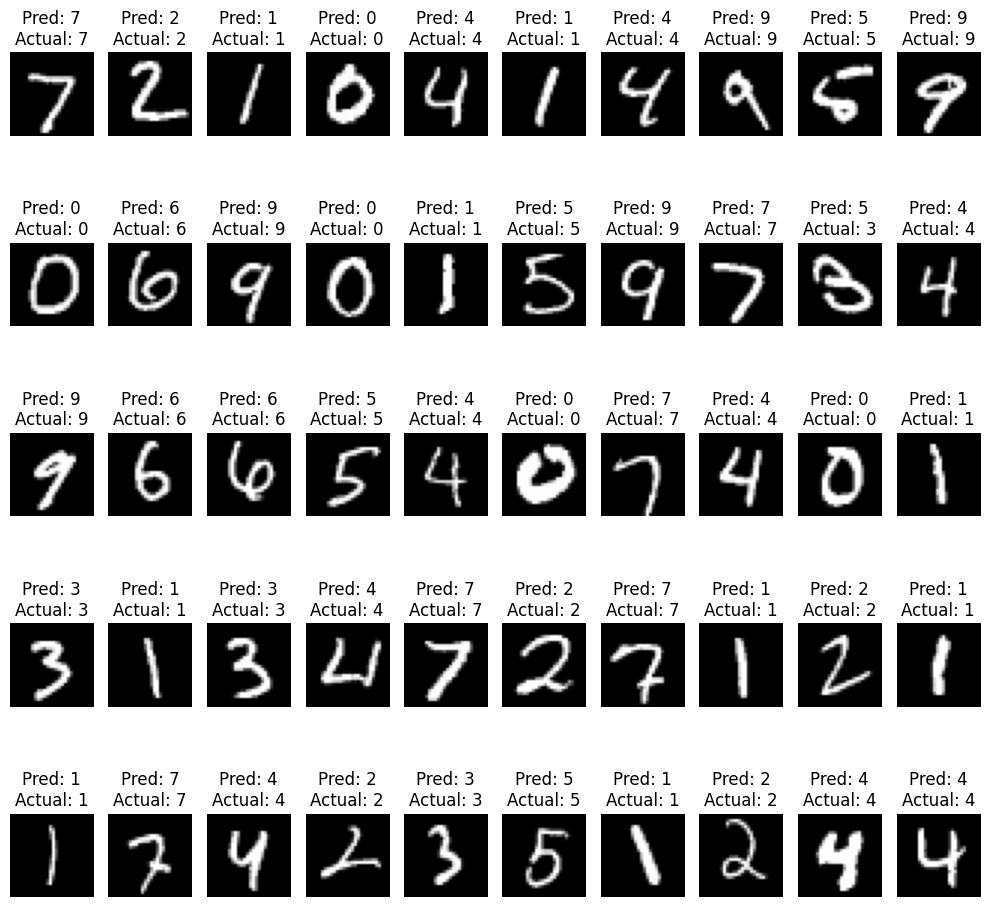

Model trained and saving.
Model trained and saved.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [50]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
tf.random.set_seed(42)


testno =  2
# Load and preprocess the data
def load_and_preprocess_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train / 255.0
    x_test = x_test / 255.0
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)
    return x_train, y_train, x_test, y_test

# Build the model
def build_model():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model
def train_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

# Evaluate the model
def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f'Test accuracy: {test_acc}')

# Visualize predictions
def visualize_predictions(model, x_test, y_test, num_images=50):
    predictions = model.predict(x_test)
    images_per_figure = 50  # Number of images to display per figure
    num_figures = (num_images + images_per_figure - 1) // images_per_figure  # Calculate the number of figures needed

    for fig_num in range(num_figures):
        plt.figure(figsize=(10, 10))
        start_idx = fig_num * images_per_figure
        end_idx = min(start_idx + images_per_figure, num_images)

        for i in range(start_idx, end_idx):
            plt.subplot(5, 10, i % images_per_figure + 1)
            plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
            plt.title(f'Pred: {np.argmax(predictions[i])}\nActual: {np.argmax(y_test[i])}')
            plt.axis('off')
            print("Done testing here" , i)

        plt.tight_layout()
        plt.show()

def main():
    x_train, y_train, x_test, y_test = load_and_preprocess_data()

    # If the model is already trained and saved, load it
    try:
        model = load_model("mnist_cnn_model.h5")
        print("Trained model loaded successfully.")
    except OSError as e:
        print(f"Error loading model: {e}")
        # If the model is not saved yet, build and train it
        model = build_model()
        train_model(model, x_train, y_train, x_test, y_test)
        print("Model trained and saved.")
        model.save("mnist_cnn_model.h5")
        print("Model trained and saved.")

    evaluate_model(model, x_test, y_test)
    visualize_predictions(model, x_test, y_test)

    print("Model trained and saving.")
    model.save("mnist_cnn_model.h5")
    print("Model trained and saved.")


if __name__ == "__main__":
    main()




**Testing.py**<br>
This file only aims to test the user images that are on the user device .

In [51]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image
import numpy as np
import tensorflow as tf

def preprocess_photo(photo_path):
    # Load the photo
    img = Image.open(photo_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28 pixels
    img_array = np.array(img) / 255.0  # Normalize pixel values
    img_array = img_array.reshape(1, 28, 28, 1)  # Reshape to (1, 28, 28, 1)
    return img_array

def predict_photo(model, photo_path):
    img_array = preprocess_photo(photo_path)
    prediction = model.predict(img_array)
    print(f'Prediction array: {prediction}')
    predicted_class = np.argmax(prediction)
    return predicted_class



# Load the trained model
model = tf.keras.models.load_model("mnist_cnn_model.h5")

# Ask the user to choose an image file
photo_path = "/content/dummy.png" # if you are using .py insted of ipynb use photo_path = "image.png"

if photo_path:
    # Predict the class of the chosen photo
    predicted_class = predict_photo(model, photo_path)
    print(f'The predicted class is: {predicted_class}')
else:
    print("No file selected.")

1/1 [==============================] - 0s 66ms/step
Prediction array: [[1.2575385e-01 9.2312913e-09 6.0124393e-04 6.5747851e-01 5.5198496e-10
  1.3198725e-04 9.0360846e-03 7.3263084e-10 1.8989488e-01 1.7103419e-02]]
The predicted class is: 3
